## Imports

In [2]:
# Python standard library
import csv
import json
import datetime
import time
import sys

# Scipy
import numpy as np
import sklearn.linear_model
import sklearn.model_selection
import sklearn.utils
import pandas as pd

import matplotlib.pyplot as plt

# Jupyter
import IPython.display

# Program-specific
sys.path.append('../modules')
import constants
import functions

## Get number of rows in data

In [8]:
df_train = functions.LoadTrainData(aug = False, mix = True)
N_train_all = len(train_df)

/home/prestonh/anaconda3/envs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2821: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [9]:
df_train.loc[df_train['inc_angle'] == 'na', 'inc_angle'] = 0

## K-Folds cross-validation for C

In [10]:
# K-Folds parameters
K = 10
kfolds = sklearn.model_selection.KFold(n_splits = K)
Cs = [1e-5*(1.5**i) for i in range(7)]
errors = [0 for i in range(len(Cs))]

print(Cs)


# Mini-batch parameters
num_passes = 25
batch_size = 500

[1e-05, 1.5000000000000002e-05, 2.25e-05, 3.375e-05, 5.0625000000000004e-05, 7.593750000000001e-05, 0.00011390625000000001]


In [15]:
t0 = time.time()


# Hyper parameter loop
for i, C in enumerate(Cs):
    
    
    '''
    Benchmarking
    '''
    IPython.display.clear_output()
    
    t = time.time()
    print('i = ', str(i), '/', str(len(Cs)), '\t\tC = ', C)
    print('dt = ', str((t - t0)/60.))
    
    
    
    
    # K-folds loop
    for j, (train_indices, valid_indices) in enumerate(kfolds.split(np.empty((N_train_all)))):
        print('\tj = ', str(j), '/', K)
    
    
        # Create the model trained on this fold
        model = sklearn.linear_model.SGDClassifier(loss= 'log', alpha = 1./C)
    
                                                     
                                                     
        # Mini-batch loop
        for k in range(num_passes):
            print('\t\tk = ', str(k), '/', num_passes)
                                                     
            np.random.shuffle(train_indices)
            
            for l in range(int(len(train_indices)/batch_size + 1)):
                print('\t\t\tl = ', str(l), '/', str(int(len(train_indices)/batch_size + 1)))

                # Get batch indices
                if l == int(len(train_indices)/batch_size+1):
                    # Last batch
                    batch_train_indices = train_indices[l*batch_size:]
                else:
                    # Not last batch
                    batch_train_indices = train_indices[l*batch_size:(l+1)*batch_size]
                                                     
                                

                # Fit model
                model.partial_fit(df_train[constants.inputs].iloc[batch_train_indices], df_train[constants.output].iloc[batch_train_indices], classes = [0, 1])
                                                     
                                                     
                                                     

                                                                       
        
        # Test model
        predictions = model.predict_proba(df_train[constants.inputs].iloc[valid_indices])

        # Get errors
        errors[i] += functions.LogLoss(predictions, df_train[constants.output])/K
        

    print(Cs[i], errors[i])
                                                     

                                                     
        
        
        
        

i =  0 / 7 		C =  1e-05
dt =  3.9859612782796225e-05
	j =  0 / 10
		k =  0 / 25
			l =  0 / 3
			l =  1 / 3
			l =  2 / 3
		k =  1 / 25
			l =  0 / 3
			l =  1 / 3
			l =  2 / 3
		k =  2 / 25
			l =  0 / 3
			l =  1 / 3
			l =  2 / 3
		k =  3 / 25
			l =  0 / 3
			l =  1 / 3
			l =  2 / 3
		k =  4 / 25
			l =  0 / 3
			l =  1 / 3
			l =  2 / 3
		k =  5 / 25
			l =  0 / 3
			l =  1 / 3
			l =  2 / 3
		k =  6 / 25
			l =  0 / 3
			l =  1 / 3
			l =  2 / 3
		k =  7 / 25
			l =  0 / 3
			l =  1 / 3
			l =  2 / 3
		k =  8 / 25
			l =  0 / 3
			l =  1 / 3
			l =  2 / 3
		k =  9 / 25
			l =  0 / 3
			l =  1 / 3
			l =  2 / 3
		k =  10 / 25
			l =  0 / 3
			l =  1 / 3
			l =  2 / 3
		k =  11 / 25
			l =  0 / 3
			l =  1 / 3
			l =  2 / 3
		k =  12 / 25
			l =  0 / 3
			l =  1 / 3
			l =  2 / 3
		k =  13 / 25
			l =  0 / 3
			l =  1 / 3
			l =  2 / 3
		k =  14 / 25
			l =  0 / 3
			l =  1 / 3
			l =  2 / 3
		k =  15 / 25
			l =  0 / 3
			l =  1 / 3
			l =  2 / 3
		k =  16 / 25
			l =  0 / 3
			

../modules/functions.py:21: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 161 but corresponding boolean dimension is 1604
  return -(np.sum(np.log(predicted[actual == 1])) + np.sum(np.log(1-predicted[actual == 0])))/len(actual)


IndexError: index 161 is out of bounds for axis 0 with size 161

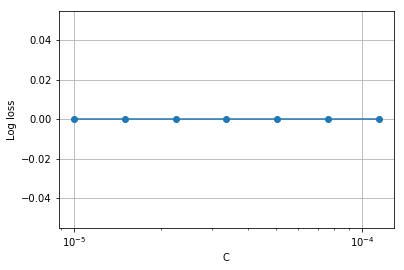

In [12]:
plt.semilogx(Cs, errors, marker = 'o')
plt.xlabel('C')
plt.ylabel('Log loss')
plt.grid()
plt.show()

In [13]:
print(errors)

[0, 0, 0, 0, 0, 0, 0]


In [14]:
print(Cs)

[1e-05, 1.5000000000000002e-05, 2.25e-05, 3.375e-05, 5.0625000000000004e-05, 7.593750000000001e-05, 0.00011390625000000001]


In [ ]:
for i in range(len(Cs)):
    print(Cs[i], '\t\t', errors[i])

## Make predictions

In [ ]:
df_train = functions.LoadTrainData(aug = False, mix = True)
N_train_all = len(df_train)




In [ ]:
df_train.loc[df_train['inc_angle'] == 'na', 'inc_angle'] = 0

##### Train model

In [ ]:
num_passes = 20
batch_size = 500

In [ ]:
t0 = time.time()

C = 7.6e-5



train_indices = [i for i in range(N_train_all)]


# Create the model trained on this fold
model = sklearn.linear_model.SGDClassifier(loss= 'log', alpha = 1./C, n_jobs = -1)


# Mini-batch loop
for i in range(num_passes):
    print('i = ', str(i), '/', num_passes)

    np.random.shuffle(train_indices)

    for j in range(int(len(train_indices)/batch_size + 1)):
        print('\tj = ', str(j), '/', str(int(len(train_indices)/batch_size + 1)))

        # Get batch indices
        if j == int(len(train_indices)/batch_size+1):
            # Last batch
            batch_train_indices = train_indices[j*batch_size:]
        else:
            # Not last batch
            batch_train_indices = train_indices[j*batch_size:(j+1)*batch_size]



        # Load in the training data for this particular batch
        #df_train = pd.read_csv(train_file_path, skiprows = [row + 1 for row in range(N_train_all) if row not in batch_train_indices], sep = ',', header = 0)

        # Fit model
        model.partial_fit(df_train[constants.inputs].iloc[train_indices], df_train[constants.output].iloc[train_indices], classes = [0, 1])

##### Make predictions

In [ ]:
df_test = pd.read_csv(test_file_path, header = 0, sep = ',', index_col = 'id')

predictions = model.predict_proba(df_test[constants.inputs])[:,1]

In [ ]:
df_train[constants.inputs].head()

In [ ]:
df_test[constants.inputs].head()

## Write to file

In [ ]:
output_file_path = '../data/submissions/submission_' + str(datetime.datetime.now().date()) + '_' + str(datetime.datetime.now().time()).replace(':', '-').split('.')[0]

with open(output_file_path, 'w') as output_file_handle:
    file_writer = csv.writer(output_file_handle, delimiter = ',')
    
    file_writer.writerow(['id', 'is_iceberg'])
    
    for i in range(len(predictions)):
        file_writer.writerow([df_test.index.values[i], predictions[i]])
        